<a href="https://colab.research.google.com/github/viyas52/stock-market-prediction-using-twitter-sentiment-analysis/blob/main/LSTM_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('model.csv')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| Date       | Open    | High    | Low     | Close   | Volume   | Sentiment   |
|:-----------|:--------|:--------|:--------|:--------|:---------|:------------|
| 2024-01-02 | 186.033 | 187.315 | 182.793 | 184.532 | 82488700 | 0           |
| 2024-01-03 | 183.121 | 184.771 | 182.335 | 183.15  | 58414500 | 0           |
| 2024-01-04 | 181.063 | 181.997 | 179.801 | 180.824 | 71983600 | 0           |
| 2024-01-05 | 180.904 | 181.669 | 179.095 | 180.099 | 62303300 | 0           |
| 2024-01-08 | 181.003 | 184.492 | 180.417 | 184.453 | 59144500 | 1           |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       302 non-null    object 
 1   Open       303 non-null    object 
 2   High       303 non-null    object 
 3   Low        303 non-null    object 
 4   Close      302 non-null    float64
 5   Volume     303 non-null    object 
 6   Sentiment  

In [3]:
import numpy as np

# Remove non-numeric characters from `Open`, `High`, `Low` and `Volume` columns
df['Open'] = df['Open'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['High'] = df['High'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['Low'] = df['Low'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['Volume'] = df['Volume'].astype(str).str.replace(r'[^0-9.]', '', regex=True)

# Convert the `Open`, `High`, `Low` and `Volume` columns to numeric
df['Open'] = pd.to_numeric(df['Open'])
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])
df['Volume'] = pd.to_numeric(df['Volume'])

# Convert the `Date` column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the `Date` column as the index
df.set_index('Date', inplace=True)

# Display the first 5 rows
print(df.head().to_markdown(index=True, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| Date                | Open    | High    | Low     | Close   | Volume      | Sentiment   |
|:--------------------|:--------|:--------|:--------|:--------|:------------|:------------|
| 2024-01-02 00:00:00 | 186.033 | 187.315 | 182.793 | 184.532 | 8.24887e+07 | 0           |
| 2024-01-03 00:00:00 | 183.121 | 184.771 | 182.335 | 183.15  | 5.84145e+07 | 0           |
| 2024-01-04 00:00:00 | 181.063 | 181.997 | 179.801 | 180.824 | 7.19836e+07 | 0           |
| 2024-01-05 00:00:00 | 180.904 | 181.669 | 179.095 | 180.099 | 6.23033e+07 | 0           |
| 2024-01-08 00:00:00 | 181.003 | 184.492 | 180.417 | 184.453 | 5.91445e+07 | 1           |
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 303 entries, 2024-01-02 to NaT
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       302 non-null    float64
 1   High       302 non-null    float64
 2   Low        302 non-null    float64
 3   Close      302 non-null    float64


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Fill missing values with the mean of each column
df['Open'].fillna(df['Open'].mean(), inplace=True)
df['High'].fillna(df['High'].mean(), inplace=True)
df['Low'].fillna(df['Low'].mean(), inplace=True)
df['Volume'].fillna(df['Volume'].mean(), inplace=True)

# Scale the data using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Volume', 'Sentiment']])

# Prepare the training data
X = []
y = []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, :])
    y.append(df['Close'].iloc[i])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (194, 60, 5)
Shape of y_train: (194,)
Shape of X_test: (49, 60, 5)
Shape of y_test: (49,)


<ipython-input-7-738c28e78976>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Open'].fillna(df['Open'].mean(), inplace=True)
<ipython-input-7-738c28e78976>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the RNN model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


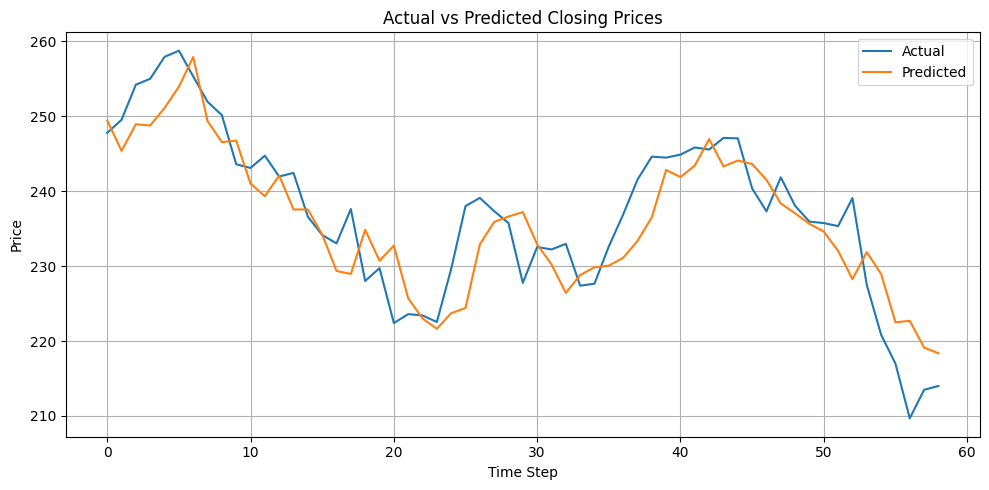

(27.521550557891775, 0.7761650916191657)

In [12]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
df = pd.read_csv('model.csv')
# Select features and target
features = ['Open', 'High', 'Low', 'Volume', 'Sentiment']
target = 'Close'
df = df.drop(df.index[-1])
# Scale features
scaler_X = MinMaxScaler()
scaled_X = scaler_X.fit_transform(df[features])

scaler_y = MinMaxScaler()
scaled_y = scaler_y.fit_transform(df[[target]])

# Create sequences for RNN
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(scaled_X, scaled_y, time_steps)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# Build RNN model
model = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Predict
y_pred_scaled = model.predict(X_test)
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled)

# Evaluation
mse = mean_squared_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

mse, r2


Epoch 1/50


<ipython-input-14-b8514528a1e7>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0929
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0112
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0045
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0032
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0027
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0022
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0022
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0016
Epoch 15/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013
Epoch 16/50
15/

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 649ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 361ms/step
Mean Squared Error (MSE): 20.0189
R² Score: 0.8373


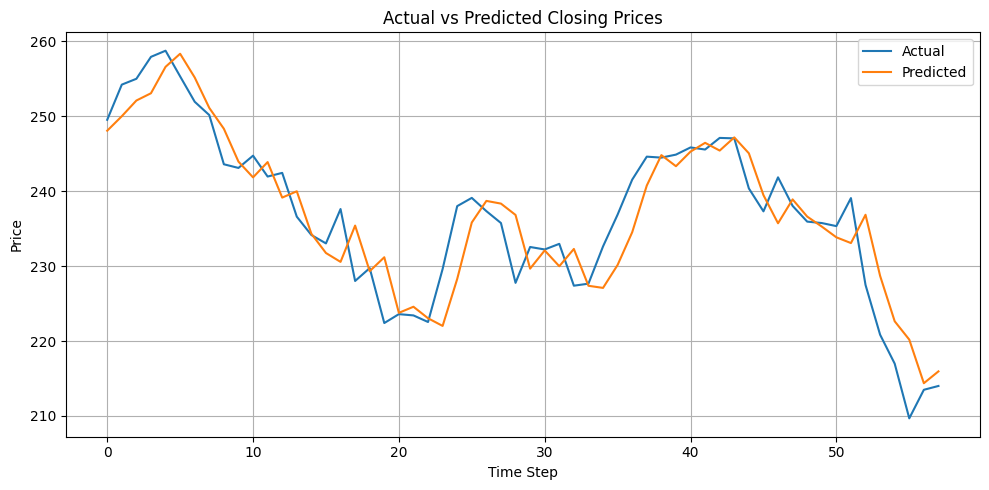

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

# Load dataset
df = pd.read_csv("model.csv")
df = df.drop(df.index[-1])
# --- Preprocessing ---
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.fillna(method='ffill', inplace=True)

# --- Rolling Features ---
window = 5
df['MA_Close'] = df['Close'].rolling(window).mean()
df['STD_Close'] = df['Close'].rolling(window).std()
df['Momentum'] = df['Close'] - df['MA_Close']
df['Returns'] = df['Close'].pct_change()

# Drop initial NaNs from rolling operations
df.dropna(inplace=True)

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'Sentiment', 'MA_Close', 'STD_Close', 'Momentum', 'Returns']
target = 'Close'

# Normalize
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(df[features])

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(df[[target]])

# Sequence creation
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# --- Bidirectional LSTM Model ---
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# --- Evaluation ---
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/50


<ipython-input-15-541468a98e1b>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1604
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0117
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0052
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0036
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0040
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0027
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0035
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0028
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0023
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0024
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0019
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0024
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0021
Epoch 15/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0018
Epoch 16/50
15/

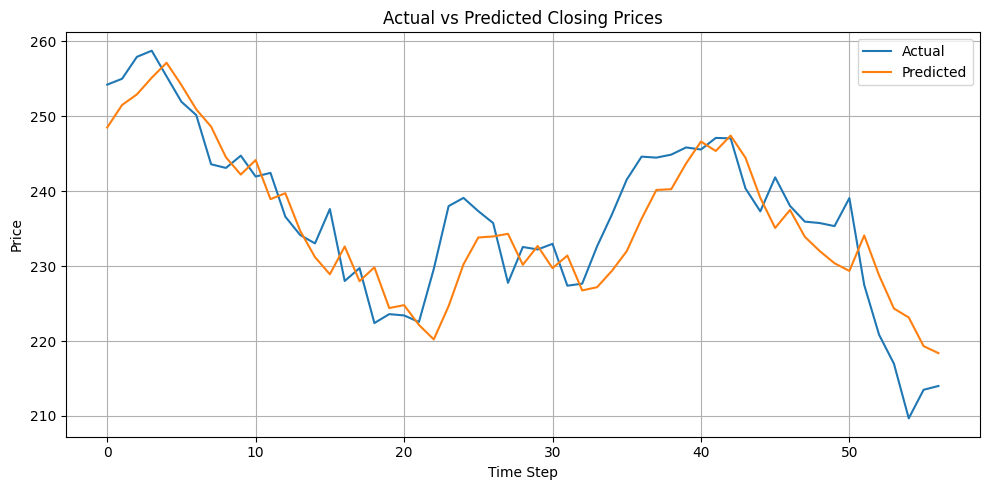

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

# Load dataset
df = pd.read_csv("model.csv")
df = df.drop(df.index[-1])
# --- Preprocessing ---
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.fillna(method='ffill', inplace=True)

# --- Rolling Features ---
window = 10
df['MA_Close'] = df['Close'].rolling(window).mean()
df['STD_Close'] = df['Close'].rolling(window).std()
df['Momentum'] = df['Close'] - df['MA_Close']
df['Returns'] = df['Close'].pct_change()

# Drop initial NaNs from rolling operations
df.dropna(inplace=True)

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'Sentiment', 'MA_Close', 'STD_Close', 'Momentum', 'Returns']
target = 'Close'

# Normalize
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(df[features])

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(df[[target]])

# Sequence creation
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# --- Bidirectional LSTM Model ---
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# --- Evaluation ---
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/50


<ipython-input-16-83dbcd3a9113>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0246
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0015
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0011
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.8800e-04
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.5370e-04
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.7160e-04
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.5194e-04
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.8482e-04
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.9509e-04
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.3234e-04
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.1931e-04
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.9116e-04
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.3146e-04
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.9983e-04
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10

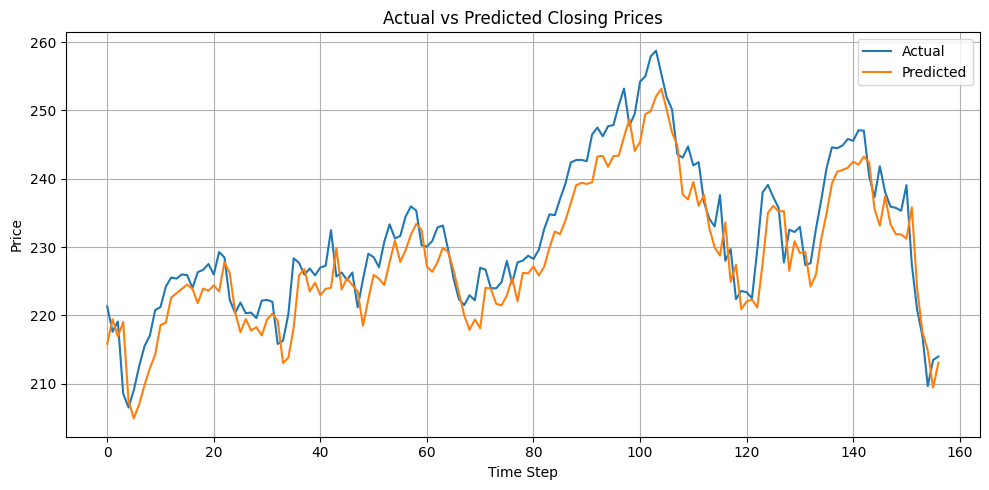

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

# Load dataset
df = pd.read_csv("modell.csv")
df = df.drop(df.index[-1])
# --- Preprocessing ---
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.fillna(method='ffill', inplace=True)

# --- Rolling Features ---
window = 10
df['MA_Close'] = df['Close'].rolling(window).mean()
df['STD_Close'] = df['Close'].rolling(window).std()
df['Momentum'] = df['Close'] - df['MA_Close']
df['Returns'] = df['Close'].pct_change()

# Drop initial NaNs from rolling operations
df.dropna(inplace=True)

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'Sentiment', 'MA_Close', 'STD_Close', 'Momentum', 'Returns']
target = 'Close'

# Normalize
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(df[features])

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(df[[target]])

# Sequence creation
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# --- Bidirectional LSTM Model ---
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# --- Evaluation ---
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/100


<ipython-input-17-5075e61a1340>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0165
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.1604e-04
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.0362e-04
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.7991e-04
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.8392e-04
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.4165e-04
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.8729e-04
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.5725e-04
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.8945e-04
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.9840e-04
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.8680e-04
Epoch 13/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.8426e-04
Epoch 14/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.1373e-04
Epoch 15/100
40/40 ━━━━━━━━

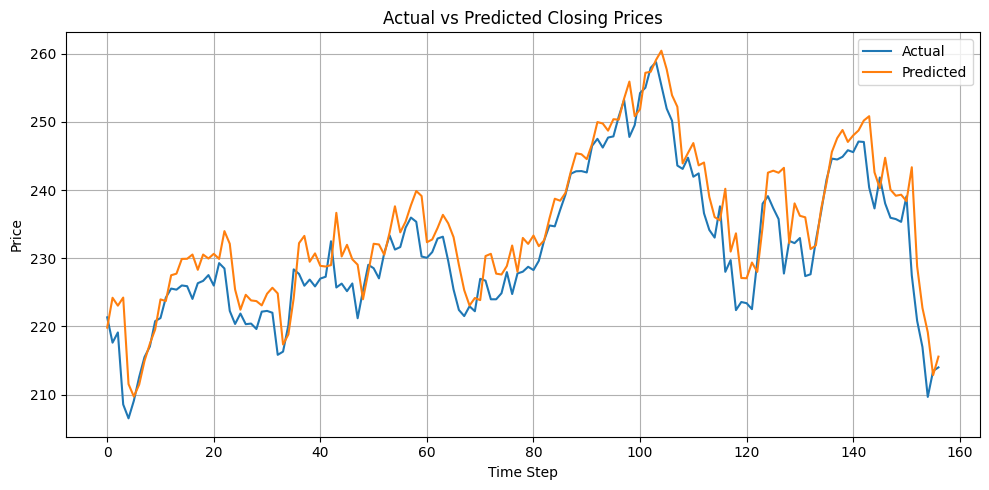

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

# Load dataset
df = pd.read_csv("modell.csv")
df = df.drop(df.index[-1])
# --- Preprocessing ---
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.fillna(method='ffill', inplace=True)

# --- Rolling Features ---
window = 10
df['MA_Close'] = df['Close'].rolling(window).mean()
df['STD_Close'] = df['Close'].rolling(window).std()
df['Momentum'] = df['Close'] - df['MA_Close']
df['Returns'] = df['Close'].pct_change()

# Drop initial NaNs from rolling operations
df.dropna(inplace=True)

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'Sentiment', 'MA_Close', 'STD_Close', 'Momentum', 'Returns']
target = 'Close'

# Normalize
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(df[features])

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(df[[target]])

# Sequence creation
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# --- Bidirectional LSTM Model ---
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# --- Evaluation ---
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
